In [1]:
import mysql.connector
import pandas as pd

connect = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Time12:30',
    database = 'tugas_akhir'
)

cursor = connect.cursor()

#fetch data
query = "SELECT dates, texts FROM kopi"
cursor.execute(query)

# Load data into DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=['Date','Text'])
cursor.close()
connect.close()

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  

# Format the date to "mm/yyyy"
df['Date'] = df['Date'].dt.strftime('%m/%Y')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2570 non-null   object
 1   Text    2570 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


In [3]:
df.describe()

,Date,Text
count,2570,2570
unique,12,2554
top,12/2023,1. fore (variatif kopinya tapi enak2) 2. point...
freq,657,2


In [4]:
# Define the list of brands to analyze
brands = ['fore', 'kopi kenangan', 'tomoro', 'point coffee']

# Initialize a dictionary to store the counts
brand_counts = {brand: 0 for brand in brands}

# Count occurrences of each brand in the Text column (case insensitive)
for brand in brands:
    brand_counts[brand] = df['Text'].str.contains(brand, case=False, na=False).sum()

# Convert the counts to a DataFrame for better visualization
brand_distribution = pd.DataFrame(list(brand_counts.items()), columns=['Brand', 'Count'])

# Display the distribution
print(brand_distribution)

           Brand  Count
0           fore   1551
1  kopi kenangan    220
2         tomoro    553
3   point coffee    389


In [5]:
# Add a new column for text length
df['Text_Length'] = df['Text'].str.len()

# Display the updated DataFrame
df

,Date,Text,Text_Length
0,07/2023,Fore dihati,11
1,07/2023,"Biasa pesen latte no sugar, menu terenak di fo...",83
2,07/2023,Aku tim point coffee,20
3,07/2023,"Masih banyak sih, tapi rata-rata fore",37
4,07/2023,yg terakhir dalgona berkedok fore,33
...,...,...,...
2565,06/2024,Yg kopi kenangan juga enak cromboloniya,39
2566,06/2024,Ini di semua kopi kenangan?,27
2567,06/2024,- feel matcha - lawson - point coffee dari aku...,69
2568,06/2024,- tomoro (plz enak bgt) - fore (kl suka creamy...,275


In [6]:
df.isnull().sum()

Date           0
Text           0
Text_Length    0
dtype: int64

In [7]:
# Find the row with the maximum Text_Length
longest_text_row = df.loc[df['Text_Length'].idxmax()]

# Display the entire row with the longest text
longest_text_row

Date                                                     12/2023
Text           first time ke tomoro mw beli croissantnya, pas...
Text_Length                                                  281
Name: 765, dtype: object

In [8]:
import re

# Define a function to check for noise in text
def contains_noise(text):
    # Check for '@', URLs, hashtags, or emojis
    noise_pattern = r'@|http[s]?://|www\.|#|[\U00010000-\U0010FFFF]'
    return bool(re.search(noise_pattern, text))

# Add a new column to indicate whether the text contains noise
df['Contains_Noise'] = df['Text'].apply(contains_noise)

# Calculate the count of texts with noise
noise_count = df['Contains_Noise'].sum()

# Display the count
print(f"Number of texts containing noise: {noise_count}")

Number of texts containing noise: 57


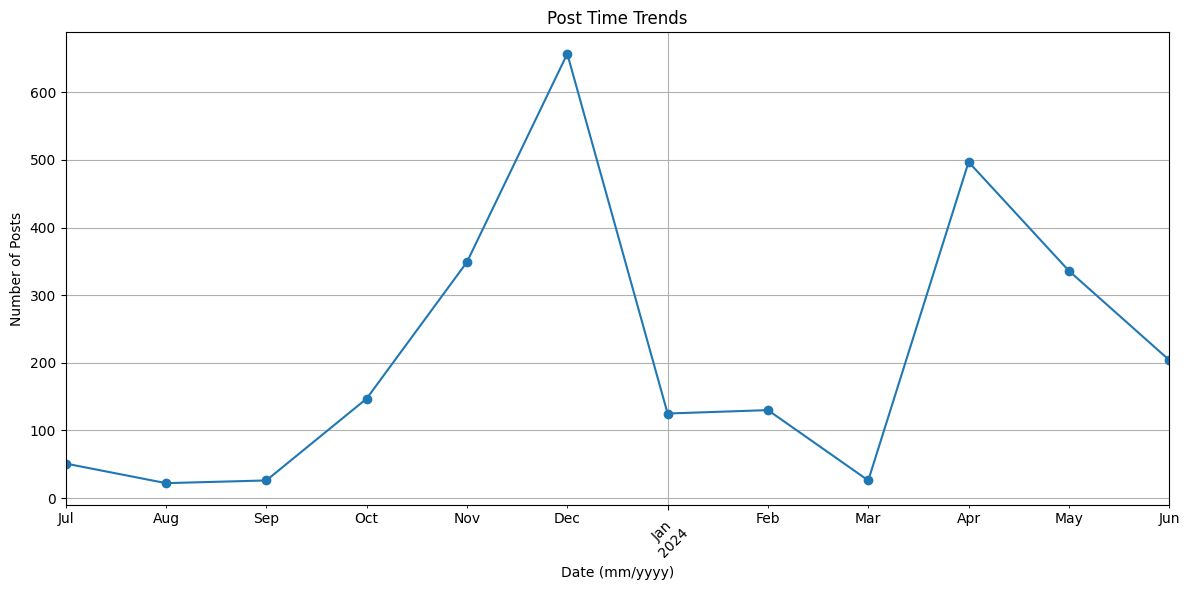

In [9]:
import matplotlib.pyplot as plt

# Group by Date and count the number of posts
post_trends = df.groupby('Date').size()

# Convert the index to datetime for proper sorting
post_trends.index = pd.to_datetime(post_trends.index, format='%m/%Y')

# Sort the trends by date
post_trends = post_trends.sort_index()

# Plot the trends
plt.figure(figsize=(12, 6))
post_trends.plot(kind='line', marker='o')
plt.title('Post Time Trends')
plt.xlabel('Date (mm/yyyy)')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Data Profile 2

import pandas as pd

df = pd.read_excel('C:/Users/atrke/Downloads/copy_kopikenangan_tomoro_fore_pointcoffe.xlsx', sheet_name='Sheet1')
df.head()

,User,Text,Date,Tweet Link,Media Links,Reply To,Target,Mentions
0,@depuyer08,Fore dihati,2024-02-04T10:00:12.000Z,https://x.com/depuyer08/status/167575740155812...,['https://pbs.twimg.com/media/F0F8ccJaMAc-uSg?...,@FOODFESS2,@depuyer08,[]
1,@preitzle,"Biasa pesen latte no sugar, menu terenak di fo...",2024-03-07T20:26:36.000Z,https://x.com/preitzle/status/1675763828045524992,['https://pbs.twimg.com/media/F0GCUCqagAA3MaR?...,@FOODFESS2,@preitzle,[]
2,@Dydydsha,Aku tim point coffee,2024-04-23T13:10:20.000Z,https://x.com/Dydydsha/status/1675775358703108096,['https://pbs.twimg.com/media/FvwNHfJaIAA7lLd?...,@FOODFESS2,@Dydydsha,[]
3,@zebraves,"Masih banyak sih, tapi rata-rata fore",2024-11-16T00:02:50.000Z,https://x.com/zebraves/status/1675776932607299586,['https://pbs.twimg.com/media/F0GOOmyaYAA3_lm?...,@FOODFESS2,@zebraves,[]
4,@tripleH_DKsy,yg terakhir dalgona berkedok fore,2024-04-12T10:49:21.000Z,https://x.com/tripleH_DKsy/status/167579209139...,['https://pbs.twimg.com/media/F0GcAtzaIAApv2J?...,@FOODFESS2,@tripleH_DKsy,[]


In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Format the 'Date' column to 'mmm-yy'
df['Date'] = df['Date'].dt.strftime('%b-%y')

# Display the updated DataFrame
df.head()

,User,Text,Date,Tweet Link,Media Links,Reply To,Target,Mentions
0,@depuyer08,Fore dihati,Feb-24,https://x.com/depuyer08/status/167575740155812...,['https://pbs.twimg.com/media/F0F8ccJaMAc-uSg?...,@FOODFESS2,@depuyer08,[]
1,@preitzle,"Biasa pesen latte no sugar, menu terenak di fo...",Mar-24,https://x.com/preitzle/status/1675763828045524992,['https://pbs.twimg.com/media/F0GCUCqagAA3MaR?...,@FOODFESS2,@preitzle,[]
2,@Dydydsha,Aku tim point coffee,Apr-24,https://x.com/Dydydsha/status/1675775358703108096,['https://pbs.twimg.com/media/FvwNHfJaIAA7lLd?...,@FOODFESS2,@Dydydsha,[]
3,@zebraves,"Masih banyak sih, tapi rata-rata fore",Nov-24,https://x.com/zebraves/status/1675776932607299586,['https://pbs.twimg.com/media/F0GOOmyaYAA3_lm?...,@FOODFESS2,@zebraves,[]
4,@tripleH_DKsy,yg terakhir dalgona berkedok fore,Apr-24,https://x.com/tripleH_DKsy/status/167579209139...,['https://pbs.twimg.com/media/F0GcAtzaIAApv2J?...,@FOODFESS2,@tripleH_DKsy,[]


In [12]:
# check duplicate
duplicates = df.duplicated()
duplicates_count = duplicates.sum()
duplicates_count

1

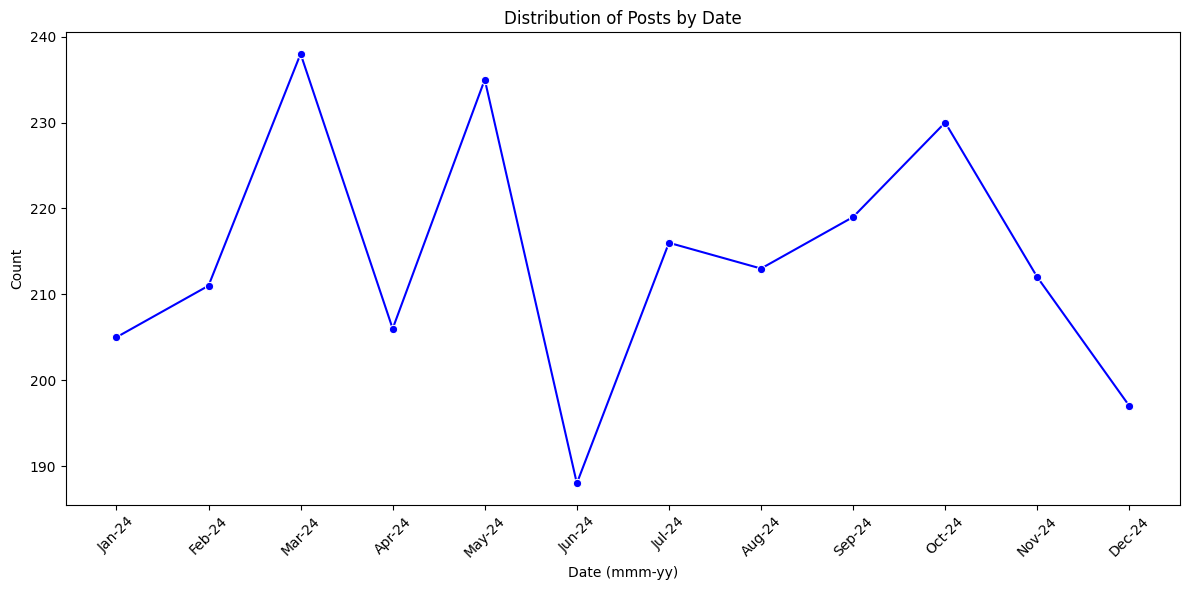

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Ensure the 'Date' column is sorted chronologically
sorted_dates = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce').dropna().sort_values().dt.strftime('%b-%y').unique()

# Group the data by 'Date' and count the occurrences
date_counts = df['Date'].value_counts().reindex(sorted_dates, fill_value=0)

# Plot the line chart for the distribution of the 'Date' column
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', color='b')
plt.title('Distribution of Posts by Date')
plt.xlabel('Date (mmm-yy)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Read the JSON file into a DataFrame
json_file_path = 'C:/Users/atrke/Downloads/dataset_easy-twitter-search-scraper_2025-04-30_20-21-14-561.json'
df_json = pd.read_json(json_file_path)

# Display the first few rows of the DataFrame
df_json

,id,url,verified,username,fullname,avatar,images,timestamp,text,links,isQuote,isRetweet,isReply,likes,replies,retweets,quotes,searchQuery,tweetUserId
0,1870334688285413888,https://x.com/FOODFESS2/status/187033468828541...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GfTDfJpXMAIbRN6.jpg],2024-12-21 05:05:00+00:00,Saranin menu tomoro dong yang enak dan kopinya...,[],False,False,False,150,68,5,13,tomoro,939277717966544896
1,1864645957649891328,https://x.com/FOODFESS2/status/186464595764989...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GeCNnVWXsAAiT3c.jpg],2024-12-05 12:20:00+00:00,fess adakah yang udah nyobain menu tomoro jjk ...,[],False,False,False,39,23,0,11,tomoro,939277717966544896
2,1864211829511049216,https://x.com/FOODFESS2/status/186421182951104...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/Gd8Cx4SXkAAsQKd.jpg],2024-12-04 07:35:00+00:00,fess ada yang udah beli TOMORO x JUJUTSU yang ...,[],False,False,False,8,1,1,0,tomoro,939277717966544896
3,1862973667082199040,https://x.com/FOODFESS2/status/186297366708219...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GdqcrRLW8AA_WVZ.jpg],2024-11-30 21:35:00+00:00,Fess semenjak pemboikotan digencarkan alhamdul...,[],False,False,False,105,20,2,2,tomoro,939277717966544896
4,1857671253634486528,https://x.com/FOODFESS2/status/185767125363448...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GcfGKHWWkAAgxg1.jpg],2024-11-16 06:25:00+00:00,"fess kopi tomoro enak bgt, kalian kalo beli ya...",[],False,False,False,2543,440,97,158,tomoro,939277717966544896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1745824250123194880,https://x.com/FFOODFESS/status/174582425012319...,False,@FFOODFESS,FESS,https://pbs.twimg.com/profile_images/171902041...,[https://pbs.twimg.com/media/GDpp5vtagAA-V8k.jpg],2024-01-12 15:05:00+00:00,Mo tanya dong fess emang matchanya tomoro warn...,[],False,False,False,66,38,3,6,tomoro,614421259
335,1745714981033943040,https://x.com/FOODFESS2/status/174571498103394...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,NaN,2024-01-12 07:50:00+00:00,"Fess pengen kopiii, mending order Calf/Tomoro ...",[],False,False,False,3,3,0,0,tomoro,939277717966544896
336,1744974985595437312,https://x.com/FOODFESS2/status/174497498559543...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,NaN,2024-01-10 06:50:00+00:00,fess rekomend menu di tomoro yg menurut kalian...,[],False,False,False,2,1,0,0,tomoro,939277717966544896
337,1744651634024800512,https://x.com/FFOODFESS/status/174465163402480...,False,@FFOODFESS,FESS,https://pbs.twimg.com/profile_images/171902041...,NaN,2024-01-09 09:25:00+00:00,"Fess Lg pengen bgt kopi tuku, tp jarak cuma 2k...",[],False,False,False,0,9,0,0,tomoro,614421259


In [20]:
# Convert the 'timestamp' column to the desired format
df_json['Formatted_Date'] = df_json['timestamp'].dt.strftime('%b-%Y')

# Display the updated DataFrame
df_json.head()

,id,url,verified,username,fullname,avatar,images,timestamp,text,links,isQuote,isRetweet,isReply,likes,replies,retweets,quotes,searchQuery,tweetUserId,Formatted_Date
0,1870334688285413888,https://x.com/FOODFESS2/status/187033468828541...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GfTDfJpXMAIbRN6.jpg],2024-12-21 05:05:00+00:00,Saranin menu tomoro dong yang enak dan kopinya...,[],False,False,False,150,68,5,13,tomoro,939277717966544896,Dec-2024
1,1864645957649891328,https://x.com/FOODFESS2/status/186464595764989...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GeCNnVWXsAAiT3c.jpg],2024-12-05 12:20:00+00:00,fess adakah yang udah nyobain menu tomoro jjk ...,[],False,False,False,39,23,0,11,tomoro,939277717966544896,Dec-2024
2,1864211829511049216,https://x.com/FOODFESS2/status/186421182951104...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/Gd8Cx4SXkAAsQKd.jpg],2024-12-04 07:35:00+00:00,fess ada yang udah beli TOMORO x JUJUTSU yang ...,[],False,False,False,8,1,1,0,tomoro,939277717966544896,Dec-2024
3,1862973667082199040,https://x.com/FOODFESS2/status/186297366708219...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GdqcrRLW8AA_WVZ.jpg],2024-11-30 21:35:00+00:00,Fess semenjak pemboikotan digencarkan alhamdul...,[],False,False,False,105,20,2,2,tomoro,939277717966544896,Nov-2024
4,1857671253634486528,https://x.com/FOODFESS2/status/185767125363448...,True,@FOODFESS2,FESS,https://pbs.twimg.com/profile_images/157712982...,[https://pbs.twimg.com/media/GcfGKHWWkAAgxg1.jpg],2024-11-16 06:25:00+00:00,"fess kopi tomoro enak bgt, kalian kalo beli ya...",[],False,False,False,2543,440,97,158,tomoro,939277717966544896,Nov-2024


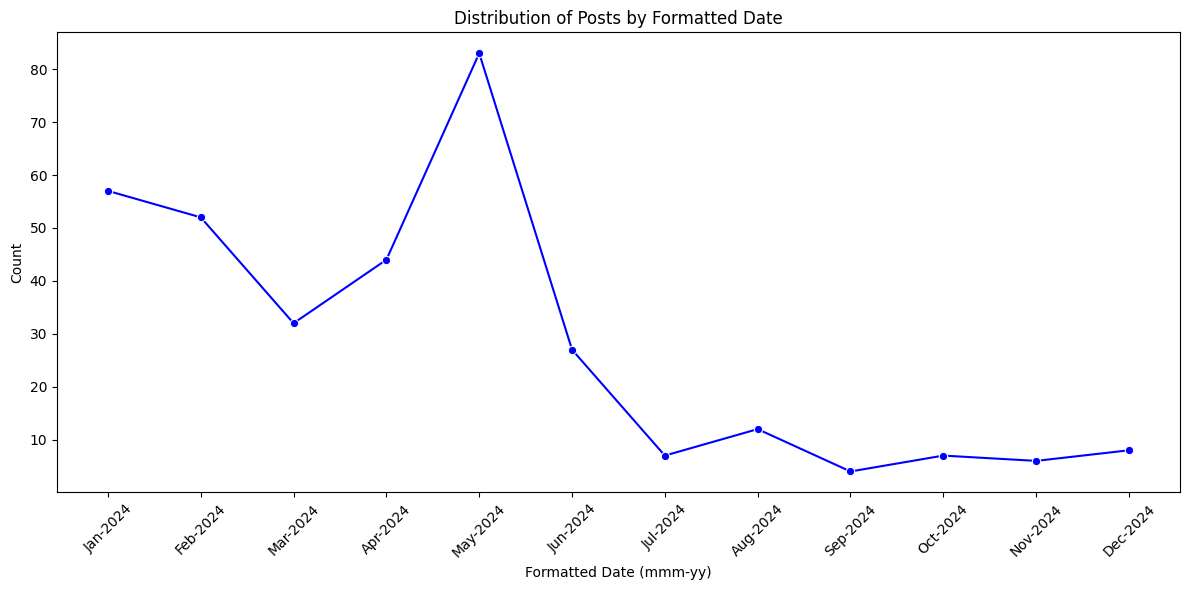

In [21]:
# Ensure the 'Formatted_Date' column is sorted chronologically
sorted_formatted_dates = pd.to_datetime(df_json['Formatted_Date'], format='%b-%Y', errors='coerce').dropna().sort_values().dt.strftime('%b-%Y').unique()

# Group the data by 'Formatted_Date' and count the occurrences
formatted_date_counts = df_json['Formatted_Date'].value_counts().reindex(sorted_formatted_dates, fill_value=0)

# Plot the line chart for the distribution of the 'Formatted_Date' column
plt.figure(figsize=(12, 6))
sns.lineplot(x=formatted_date_counts.index, y=formatted_date_counts.values, marker='o', color='b')
plt.title('Distribution of Posts by Formatted Date')
plt.xlabel('Formatted Date (mmm-yy)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the CSV file into a DataFrame
file_path = '../data/output/crawl/merged_crawling_result.csv'
df_crawl = pd.read_csv(file_path)

# Generate a profile report
profile = ProfileReport(df_crawl, title="Data Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("../data/output/crawl/data_profiling_report.html")

# Display the report inline (if supported in your environment)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 13.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]